<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [4]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_role']
relevant_columns

['tools_programming_languages', 'salary_monthly_NETO', 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [5]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [6]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Infosec,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:30]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [10]:
#veo los roles que hay
role_count = df.work_role.value_counts()
role_count[:30]

Developer                         2402
SysAdmin / DevOps / SRE            689
Technical Leader                   399
QA / Tester                        254
Manager / Director                 231
HelpDesk                           198
Project Manager                    193
Architect                          175
Data Scientist / Data Engineer     140
Consultant                         139
BI Analyst / Data Analyst          135
Networking                         132
Business Analyst                   111
UX                                  95
Infosec                             85
Recruiter / HR                      55
Designer                            54
DBA                                 52
Product Manager                     50
Scrum Master                        48
VP / C-Level                        36
Sales / Pre-Sales                   27
Middleware                          22
Finance                             14
Storage / Backup                    10
Technical Writer         

In [12]:
#selecciono los roles que me interesan, vinculados al análisis de datos
interesting_role = ["Data Scientist / Data Engineer", "BI Analyst / Data Analyst"]
filtered_df_role = df_lang[df_lang.work_role.isin(interesting_role)]
filtered_df_role[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
19,python,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,scala,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,sql,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
33,bash/shell,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"
33,python,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"


In [14]:
#Ahora veo cuáles son los lenguajes que más usan los cientistas de daots
language_count = filtered_df_role.programming_language.value_counts()
language_count[:30]

sql           182
python        168
r              48
bash/shell     37
javascript     33
java           28
html           26
vba            18
css            17
c#             17
scala          17
.net           15
php            10
c++            10
matlab          5
go              5
ruby            4
kotlin          3
typescript      3
abap            3
c               3
cobol           2
qlik            2
dax             2
ninguno         2
dart            2
qvx             1
windev          1
perl            1
mongodb         1
Name: programming_language, dtype: int64

In [26]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#voy a elegir los lenguajes más relevantes para este grupo. Los tres que se mencionan en varios artículos revisados,
#son también los que tienen una frecuencia mayor en este grupo
interesting_languages = ["python", "r", "sql"]
filtered_df_lang = filtered_df_role[filtered_df_role.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
19,python,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,sql,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
33,python,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"
57,sql,SQL,75000.0,BI Analyst / Data Analyst,[sql]
82,python,"Python, R, Qlik",34500.0,BI Analyst / Data Analyst,"[python, r, qlik]"


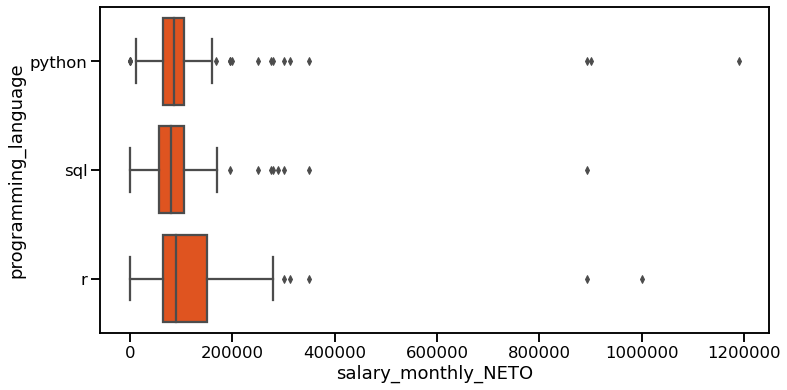

In [31]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x=filtered_df_lang.salary_monthly_NETO, y=filtered_df_lang.programming_language,
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [45]:
#acá voy a calcular el salario promedio para data scientists/analistas y para la muestra total. 
#Lo hago sobre el df original porque en el que tenemos, hay casos multplicados de gente que programa en más de un lenguaje
interesting_role = ["Data Scientist / Data Engineer", "BI Analyst / Data Analyst"]
role_casos = df[df.work_role.isin(interesting_role)]
role_casos[:5]

salary_analistas = role_casos.salary_monthly_NETO
avg_salary_analistas = salary_analistas.mean()

salary_all = df.salary_monthly_NETO
avg_salary_all = salary_all.mean()
avg_salary, avg_salary_all

(98064.35896654276, 94907.9491018188)

In [ ]:
#ahora habría que calcular la probabilidad de ganar más que la media si programas en cada lenguaje.
#otra cosa que podríamos hacer es es calcular los deciles y ver en qué programan las personas que están en el decil más alto.
#también se pueden hacer gráficos de la distribución del salario para cada uno de los tres programas. Por ejemplo, superponer las 3 curvas

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
